# Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("Leads.csv")

In [ ]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
data.shape

(9240, 37)

In [ ]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
data["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [ ]:
data["Lead Quality"].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [ ]:
led_col_mis = data["Lead Quality"].isnull().sum()

In [ ]:
led_col_mis/len(data)*100

51.590909090909086

In [ ]:
# there is more than 50% data missing, that's why we drop this column

In [ ]:
data.drop("Lead Quality",axis=1, inplace = True)

In [ ]:
data["Asymmetrique Activity Index"].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [ ]:
data["Asymmetrique Activity Index"].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [ ]:
act_col_mis = data["Asymmetrique Activity Index"].isnull().sum()

In [ ]:
act_col_mis/len(data)*100

45.64935064935065

In [ ]:
3839/len(data)*100

41.54761904761905

In [ ]:
# in this col, there in ~42% data belong to one category and ~46% data is missing, that is imbalance col, that's why droped.

In [ ]:
data.drop("Asymmetrique Activity Index", axis =1, inplace = True)

In [ ]:
data["Asymmetrique Profile Index"].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [ ]:
prf_mis = data["Asymmetrique Profile Index"].isnull().sum()

In [ ]:
prf_mis/len(data)*100

45.64935064935065

In [ ]:
data.drop("Asymmetrique Profile Index", axis =1, inplace = True)

In [ ]:
data["Asymmetrique Profile Score"].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [ ]:
data["Asymmetrique Profile Score"].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

In [ ]:
# ~45% data missing, might be important col, that's why fill with '0.0'

In [ ]:
data["Asymmetrique Profile Score"].fillna(0.0,inplace = True)

In [ ]:
data["Asymmetrique Profile Score"].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12.,  0., 11.])

In [ ]:
data["Asymmetrique Activity Score"].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [ ]:
# ~45% data missing, filled by 0

In [ ]:
data["Asymmetrique Activity Score"].fillna(0.0,inplace = True)

In [ ]:
data["Asymmetrique Activity Score"].unique()

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18.,  0.,  7.])

In [ ]:
data["Tags"].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [ ]:
data["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [ ]:
tgs_mss = data["Tags"].isnull().sum()
tgs_mss/len(data)*100

36.28787878787879

In [ ]:
# ~36% data missing, created new category named as "Not defined"

In [ ]:
data["Tags"].fillna("Not defined",inplace =True)

In [ ]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
data["Lead Profile"].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [ ]:
data["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
data["Lead Profile"].isnull().sum()/len(data)*100

29.318181818181817

In [ ]:
data["Lead Profile"].fillna(data["Lead Profile"].mode()[0],inplace= True)

In [ ]:
data["City"].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [ ]:
data["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
data["City"].fillna(data["City"].mode()[0],inplace= True)

In [ ]:
data["Lead Source"].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [ ]:
data["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [ ]:
# if ctagorical col has less than 30% missing values filled by mode

In [ ]:
categorical_columns = data.select_dtypes(include=["object"]).columns
for column_name in categorical_columns:
    if data[column_name].isnull().any():
        mode_value = data[column_name].mode()[0]
        data[column_name].fillna(mode_value, inplace=True)

In [ ]:
data["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [ ]:
data["TotalVisits"].mean()

3.445237833681204

In [ ]:
# there is all interger values and filling by mean create decimal value that's why filled by using mode

In [ ]:
data["TotalVisits"].fillna(data["TotalVisits"].mode()[0], inplace=True)

In [ ]:
data["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [ ]:
# it already has floating/decimal values, filled by mean

In [ ]:
data["Page Views Per Visit"].fillna(data["Page Views Per Visit"].mean(), inplace=True)

In [ ]:
data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [ ]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,Interested in other courses,No,No,Select,Select,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,Ringing,No,No,Select,Select,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,Will revert after reading the email,No,No,Potential Lead,Mumbai,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,Ringing,No,No,Select,Mumbai,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,Will revert after reading the email,No,No,Select,Mumbai,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,Will revert after reading the email,No,No,Potential Lead,Mumbai,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,wrong number given,No,No,Potential Lead,Mumbai,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,invalid number,No,No,Potential Lead,Mumbai,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,Not defined,No,No,Select,Other Metro Cities,15.0,16.0,No,No,SMS Sent


In [ ]:
data.to_csv("Lead Data.csv")

# Analysis using plots

In [ ]:
!pip install --upgrade matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,Interested in other courses,No,No,Select,Select,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,Ringing,No,No,Select,Select,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,Will revert after reading the email,No,No,Potential Lead,Mumbai,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,Ringing,No,No,Select,Mumbai,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,Will revert after reading the email,No,No,Select,Mumbai,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,Will revert after reading the email,No,No,Potential Lead,Mumbai,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,wrong number given,No,No,Potential Lead,Mumbai,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,invalid number,No,No,Potential Lead,Mumbai,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,Not defined,No,No,Select,Other Metro Cities,15.0,16.0,No,No,SMS Sent


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [ ]:
data.shape

(9240, 34)

In [ ]:
data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

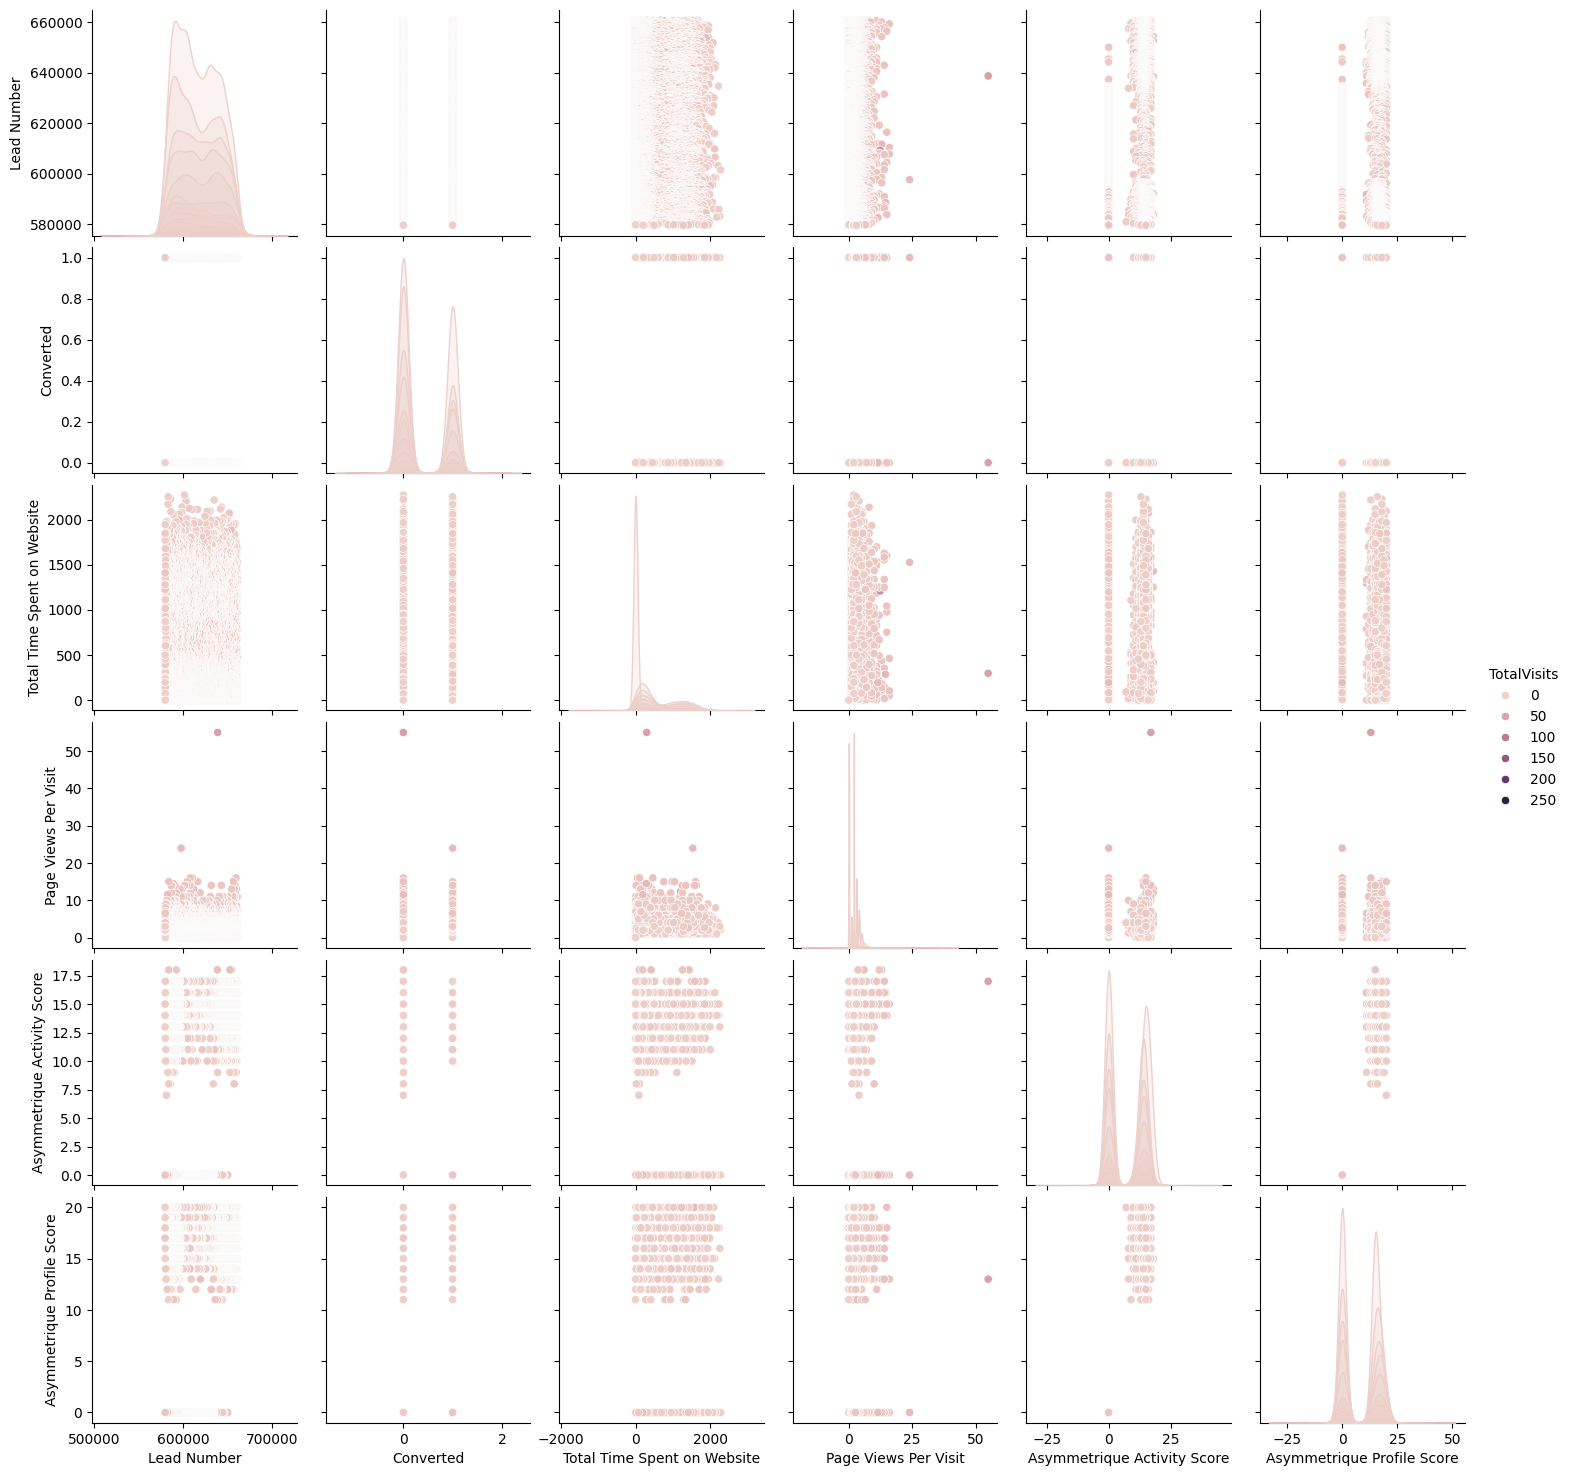

In [ ]:
sns.pairplot(data, hue='TotalVisits')
plt.show()

Inference:

The Total visits across all the varibales

In [ ]:
# Check unique values in the 'Tags' column
unique_tags = data['Tags'].unique()
print(unique_tags)


['Interested in other courses' 'Ringing'
 'Will revert after reading the email' 'Not defined' 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000')])

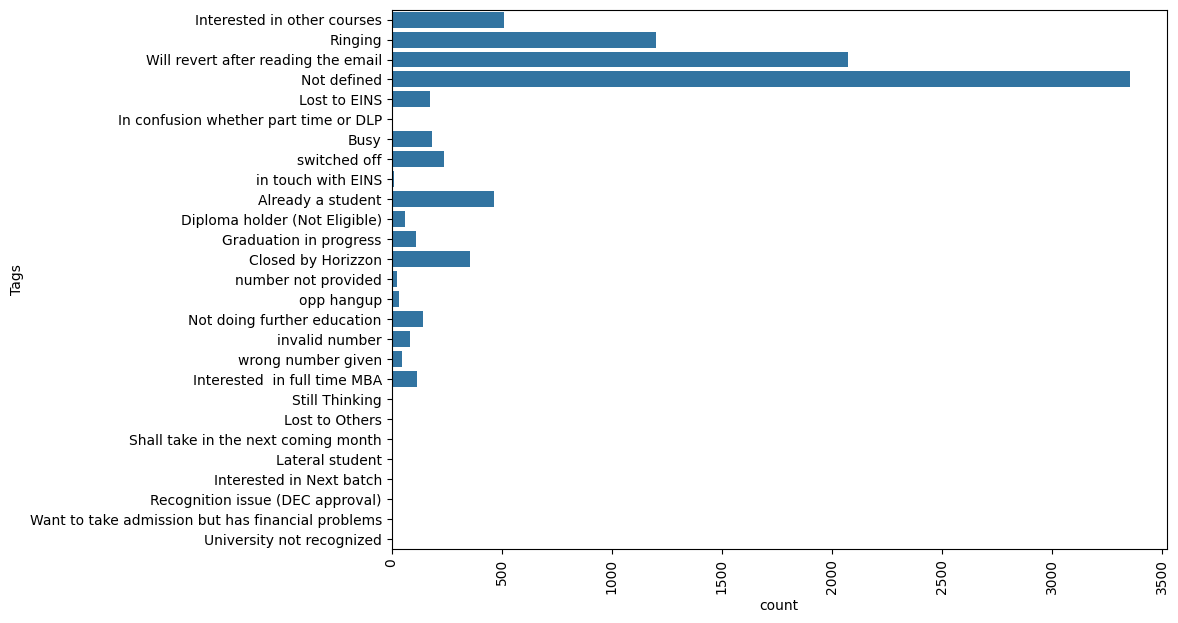

In [ ]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(data['Tags'])
plt.xticks(rotation=90)

Inference:

1.The highest call status is "Not Defined"

2.The 40% of respondents will revert after reading the email.

3.The 20% of respondents call status is ringing

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000')])

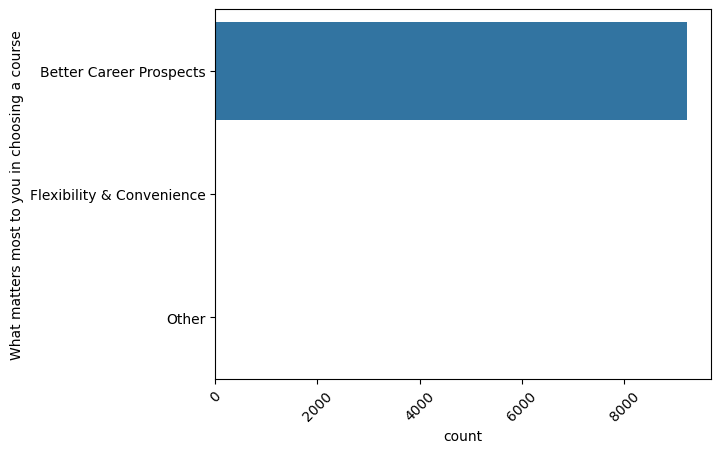

In [ ]:
# Visualizing this column
sns.countplot(data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

Inference:


The Highest Votes for choosing the course is Better Career Prospects

In [ ]:
# Finding the percentage of the different categories of this column:
round(data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [ ]:
# Finding the percentage of the different categories of this column:
round(data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              90.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

# Analysis & Plotting

In [ ]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.53896103896104

The Lead conversion rate is 38%

([0, 1, 2, 3, 4],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

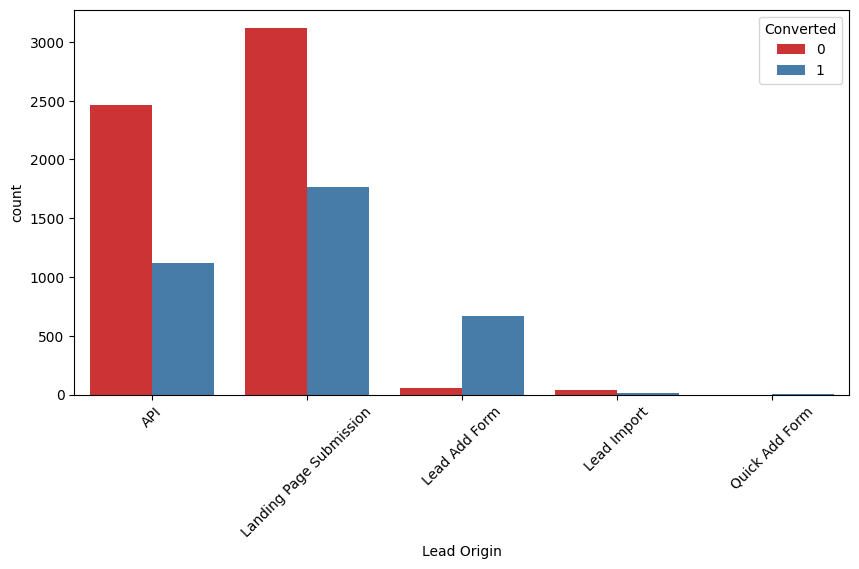

In [ ]:
#LEAD ORIGIN

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 45)

Inference:

1.API and Landing Page Submissions yield a conversion rate of 30-35%, resulting in a substantial number of generated leads.

2.The Lead Add Form boasts an impressive conversion rate exceeding 90%, although the total lead count remains relatively low.

3.Lead Imports contribute very few leads to the overall count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'google'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

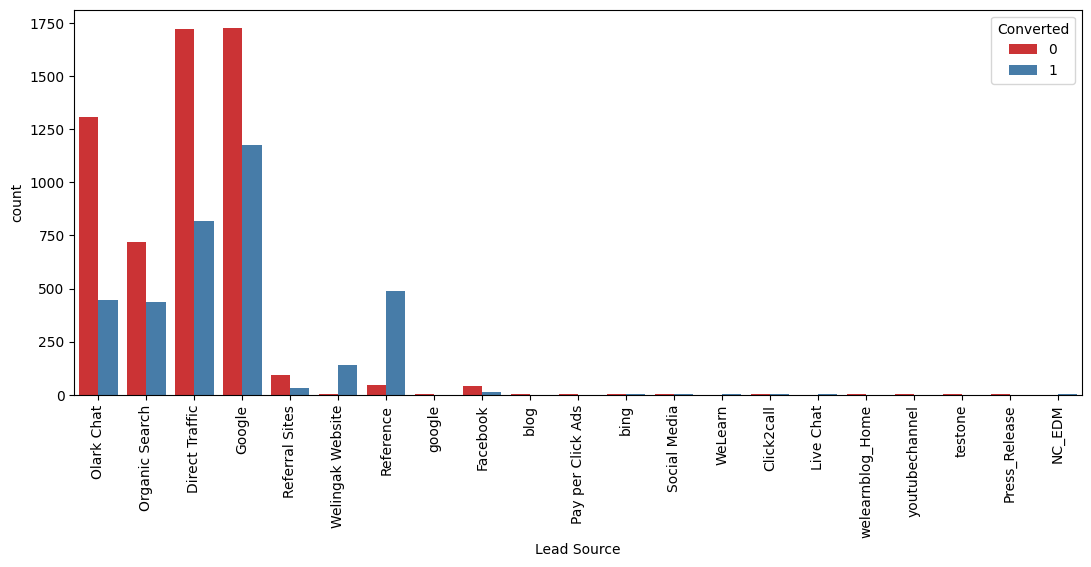

In [ ]:
#LEAD SOURCE

plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, palette='Set1')
plt.xticks(rotation = 90)

In [ ]:
# Need to replace 'google' with 'Google'
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')

In [ ]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

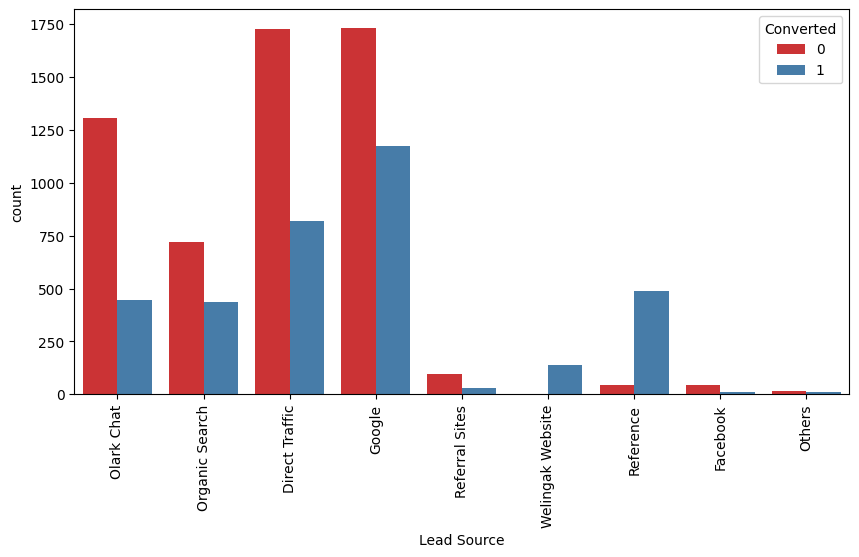

In [ ]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

1.The most substantial number of leads is generated through Google and Direct traffic sources.

2.The conversion rate for reference leads and leads originating from the Welingak website is notably high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

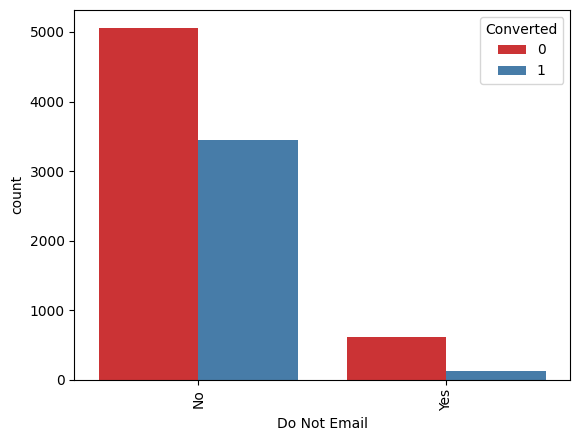

In [ ]:
#DO NOT EMAIL

sns.countplot(x = "Do Not Email", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Most of the entries are 'NO' No Inference can be drawn with this parameter.


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

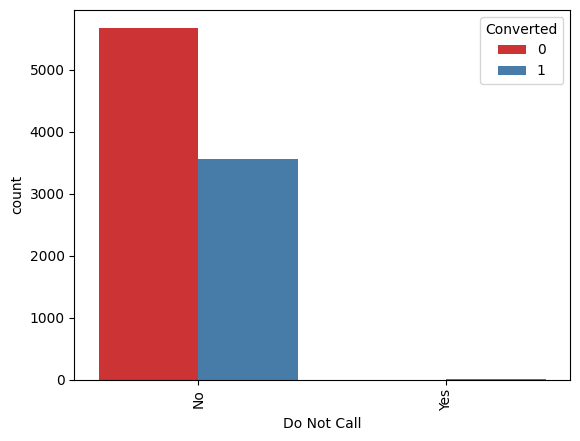

In [ ]:
#DO NOT CALL

sns.countplot(x = "Do Not Call", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Most entries are 'No'. No Inference can be drawn with this parameter.

In [ ]:
#TOTAL VISITS

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: ylabel='TotalVisits'>

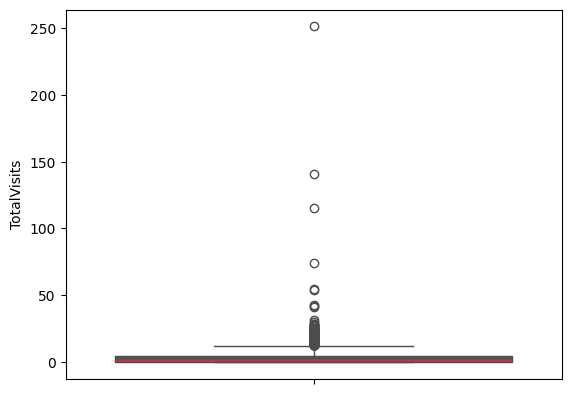

In [ ]:
sns.boxplot(data['TotalVisits'],orient='vert',palette='Set1')

Inference:

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [ ]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='TotalVisits'>

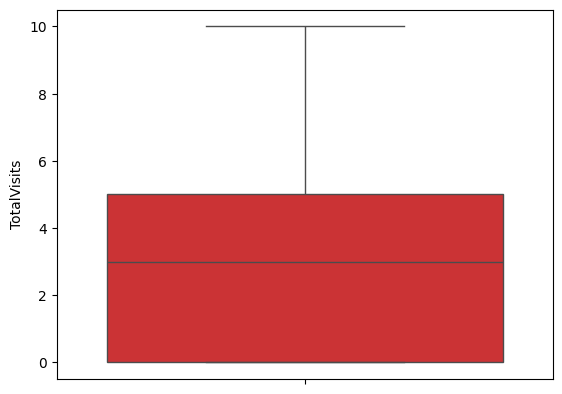

In [ ]:
# Visualizing again
sns.boxplot(data['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

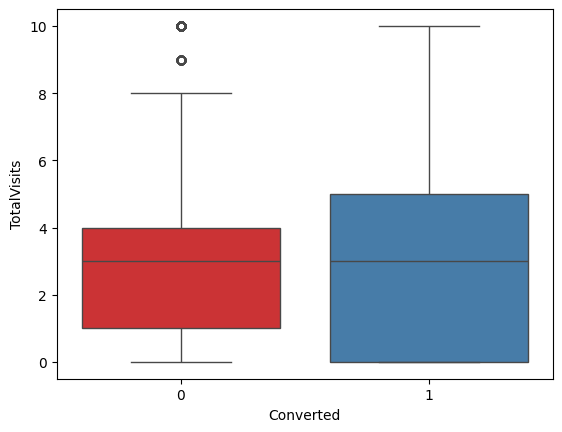

In [ ]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data,palette='Set1')

Inference:

Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

In [ ]:
#TOTAL TIME SPENT ON WEBSITE

data['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: ylabel='Total Time Spent on Website'>

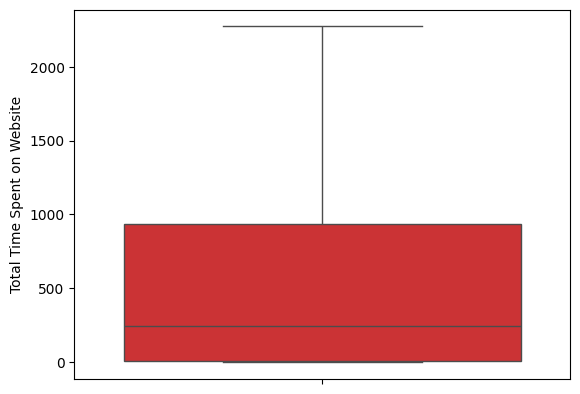

In [ ]:
sns.boxplot(data['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

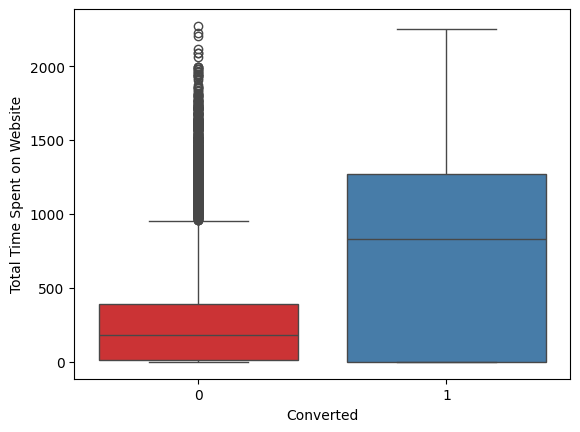

In [ ]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data,palette='Set1')

Inference:

Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time.

In [ ]:
#PAGE VIEW PER VISIT

data['Page Views Per Visit'].describe()

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: ylabel='Page Views Per Visit'>

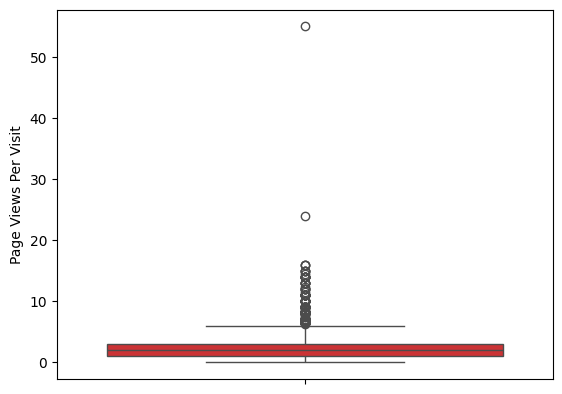

In [ ]:
sns.boxplot(data['Page Views Per Visit'],orient='vert',palette='Set1')

Inference:

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [ ]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='Page Views Per Visit'>

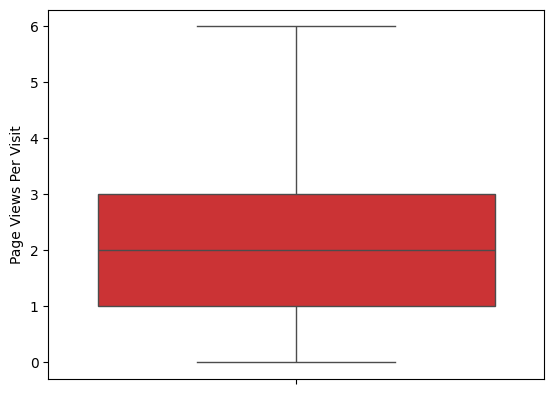

In [ ]:
# Visualizing again
sns.boxplot(data['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

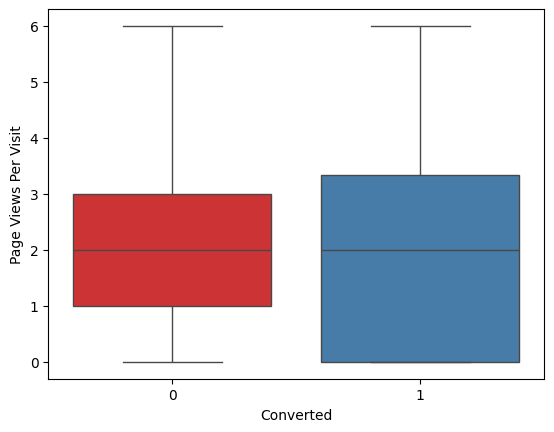

In [ ]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =data,palette='Set1')

Inference:

Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

In [ ]:
#LAST ACTIVITY

data['Last Activity'].describe()

count             9240
unique              17
top       Email Opened
freq              3540
Name: Last Activity, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'Approached upfront'),
  Text(12, 0, 'SMS Sent'),
  Text(13, 0, 'Visited Booth in Tradeshow'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

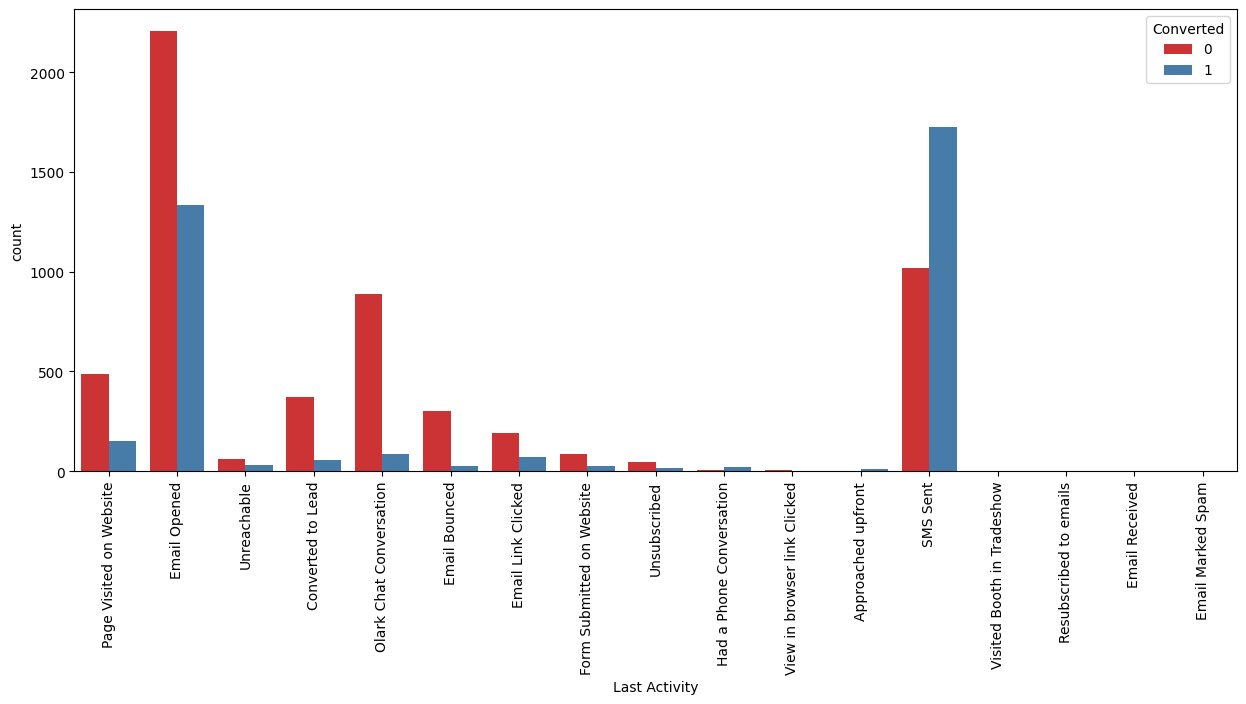

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

In [ ]:
# We can club the last activities to "Other_Activity" which are having less data.
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

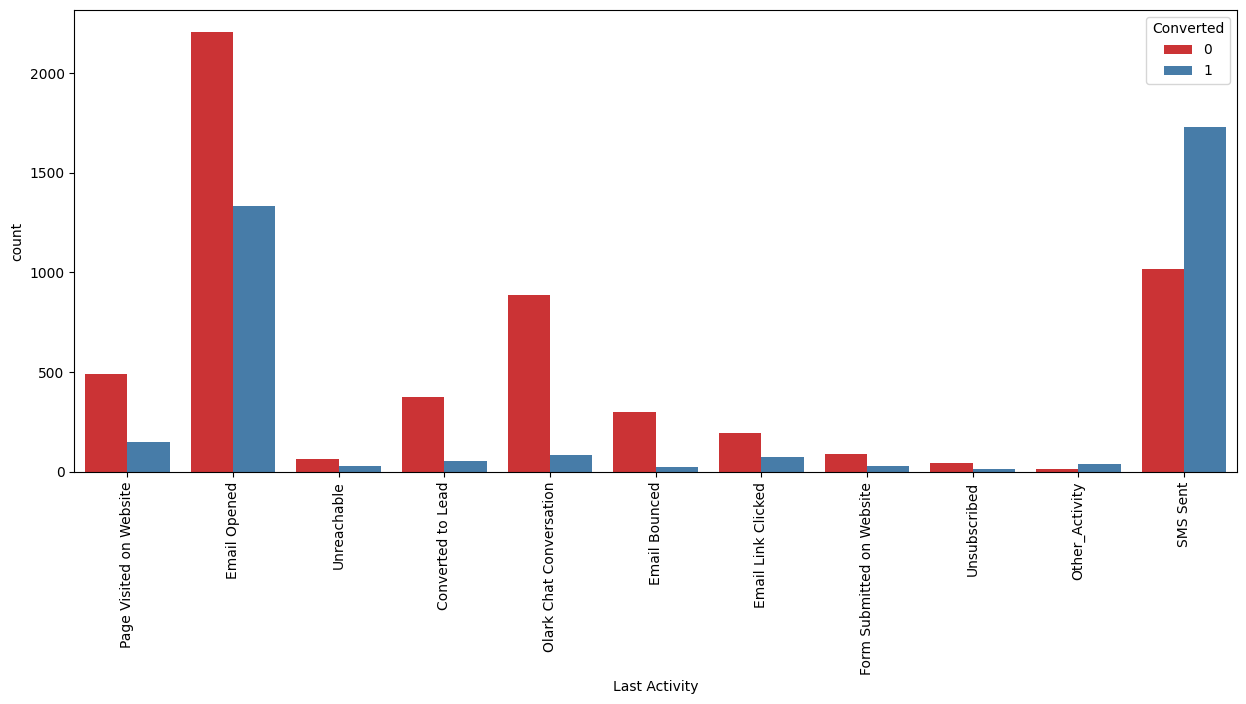

In [ ]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:
    
Most of the lead have their Email opened as their last activity.

Conversion rate for leads with last activity as SMS Sent is almost 60%.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'

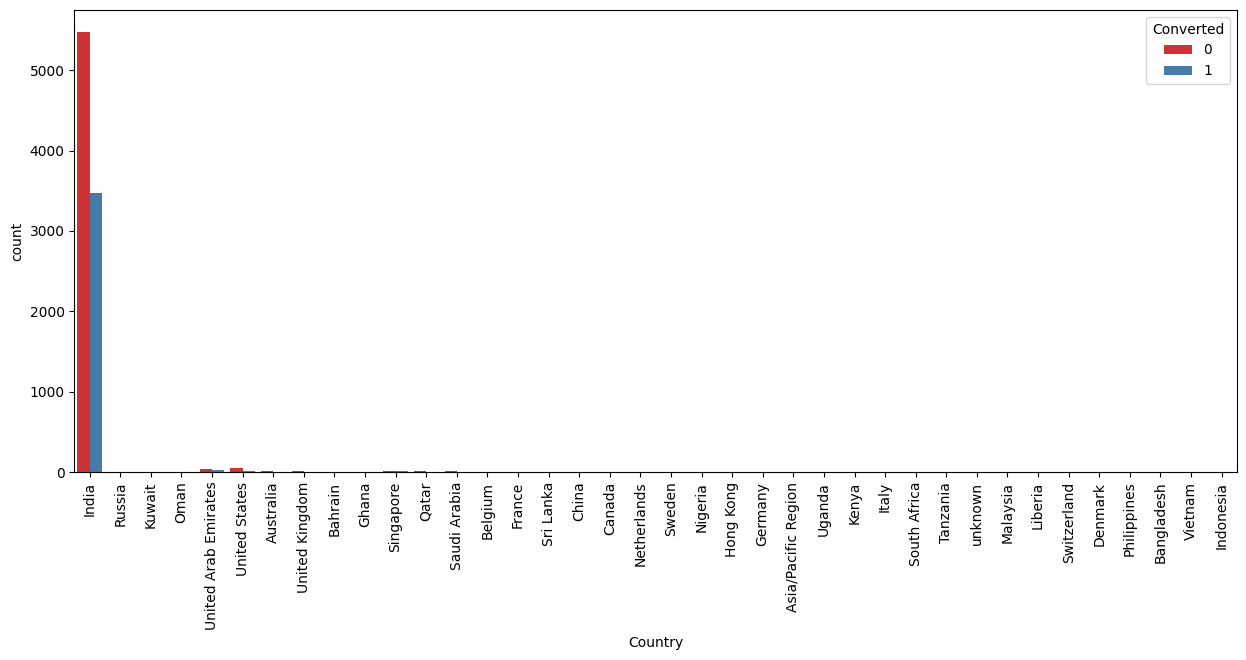

In [ ]:
#COUNTRY

plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Most values are 'India' no such inference can be drawn

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Select'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

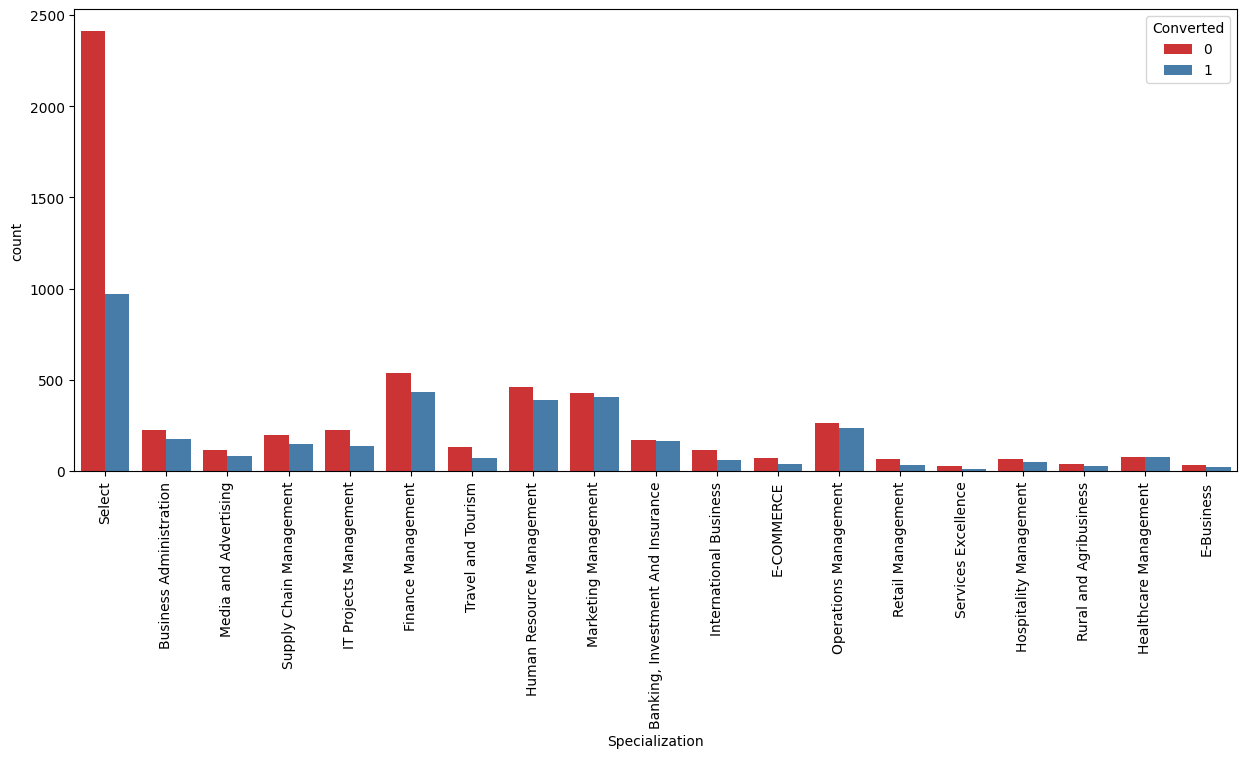

In [ ]:
#SPECIALIZATION

plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Focus should be more on the Specialization with high conversion rate.

The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

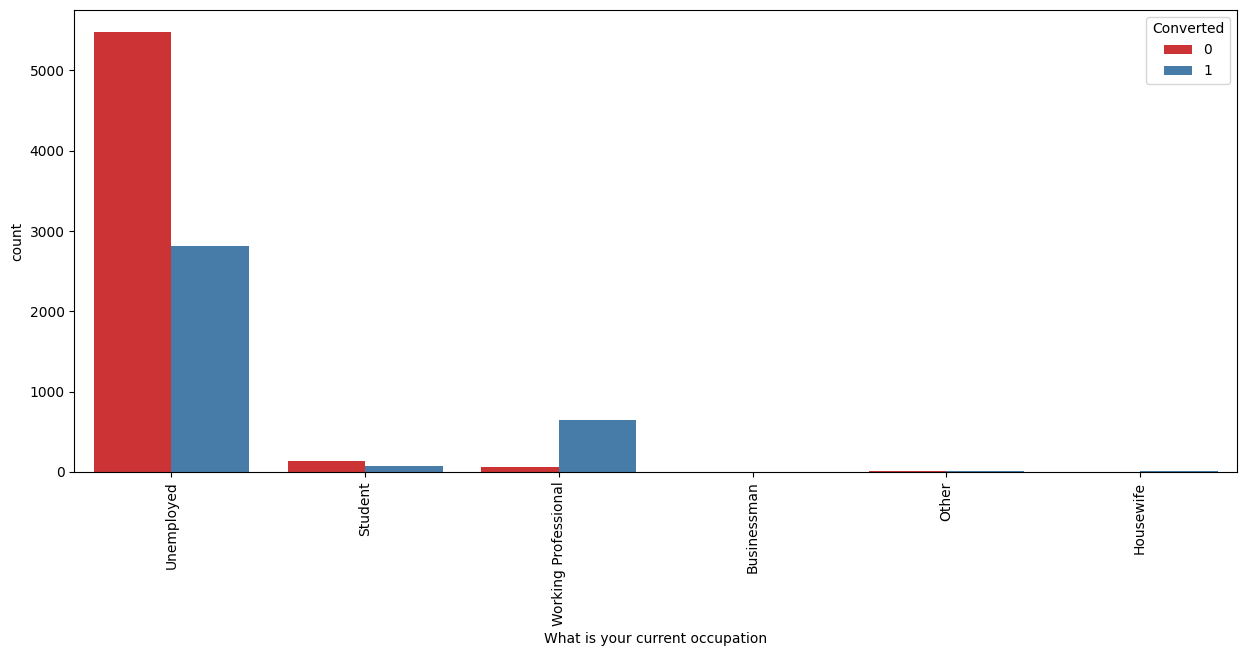

In [ ]:
#WHAT IS YOUR CURRENT OCCUPATION

plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

1.Working Professionals going for the course have high chances of joining it.

2.Unemployed leads are the most in numbers but has around 30-35% conversion rate.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Not defined'),
  Text(4, 0, 'Lost to EINS'),
  Text(5, 0, 'In confusion whether part time or DLP'),
  Text(6, 0, 'Busy'),
  Text(7, 0, 'switched off'),
  Text(8, 0, 'in touch with EINS'),
  Text(9, 0, 'Already a student'),
  Text(10, 0, 'Diploma holder (Not Eligible)'),
  Text(11, 0, 'Graduation in progress'),
  Text(12, 0, 'Closed by Horizzon'),
  Text(13, 0, 'number not provided'),
  Text(14, 0, 'opp hangup'),
  Text(15, 0, 'Not doing further education'),
  Text(16, 0, 'invalid number'),
  Text(17, 0, 'wrong number given'),
  Text(18, 0, 'Interested  in full time MBA'),
  Text(19, 0, 'Still Thinking'),
  Text(20, 0, 'Lost to Others'),
  Text(21, 0, 'Shall take in the next coming month'),
  Text(22, 

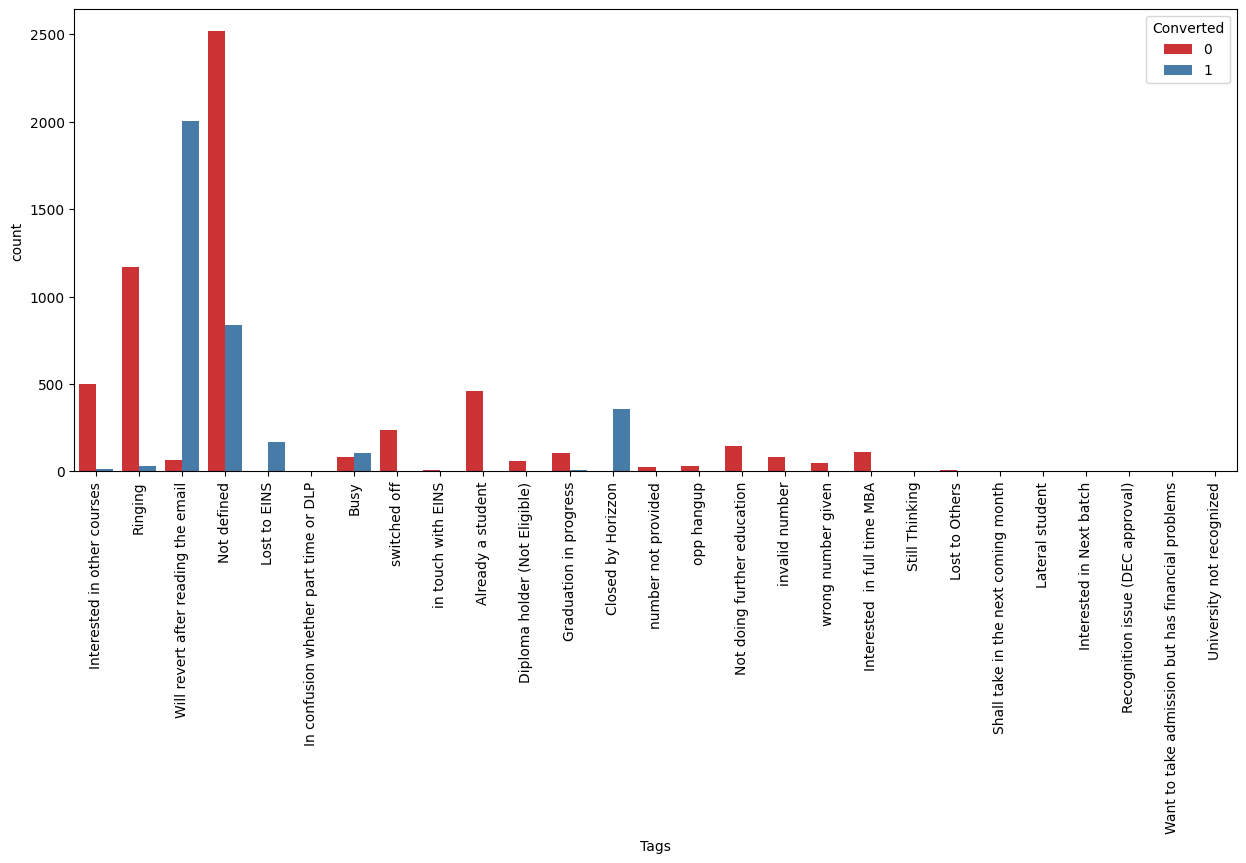

In [ ]:
#TAGS

plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Select'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Thane & Outskirts'),
  Text(3, 0, 'Other Metro Cities'),
  Text(4, 0, 'Other Cities'),
  Text(5, 0, 'Other Cities of Maharashtra'),
  Text(6, 0, 'Tier II Cities')])

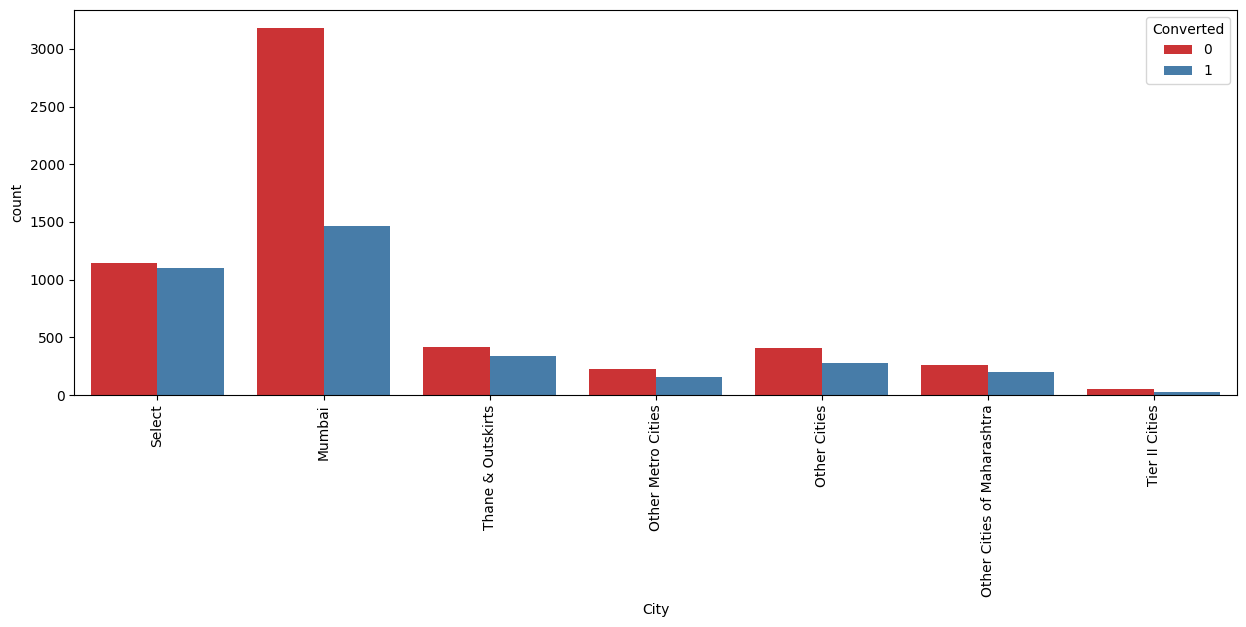

In [ ]:
#CITY

plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Inference:

1.Most leads are from mumbai with around 50% conversion rate.

2.The "Select" option is where they haven't opted for cities selection.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

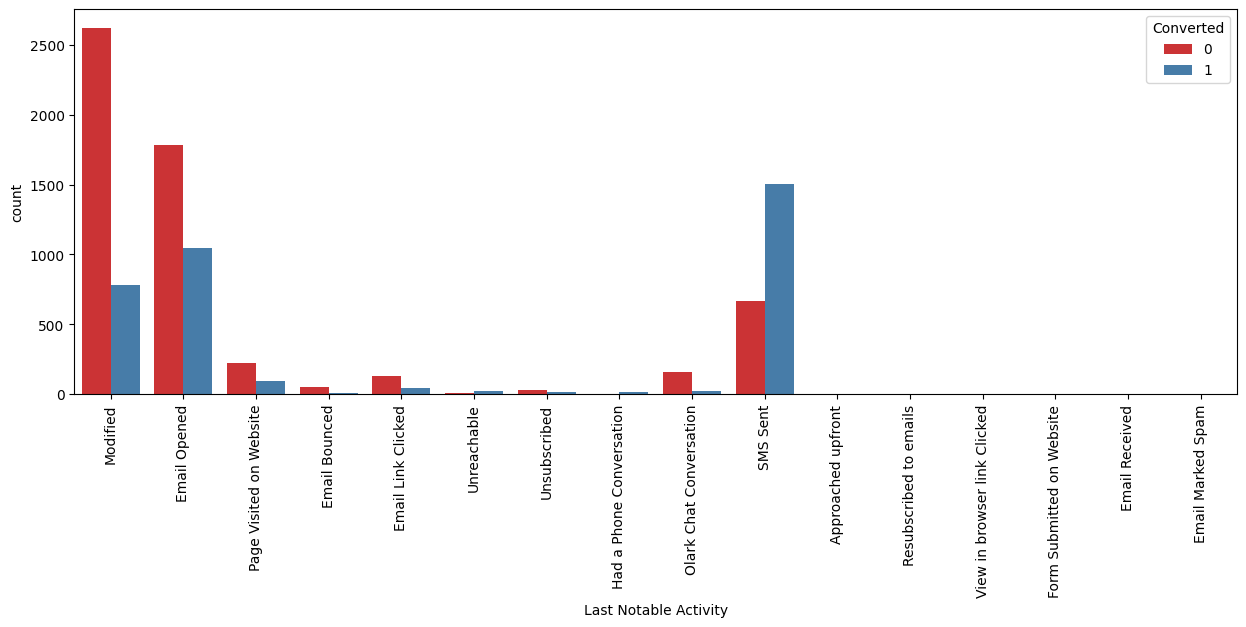

In [ ]:
#LAST NOTABLE ACTIVITY

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)

Results:

Based on the analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [ ]:
data = data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [ ]:
data.shape

(9240, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [ ]:
#Converting some binary variables (Yes/No) to 1/0

In [ ]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data[vars] = data[vars].apply(binary_map)

# Creating Dummy Variables for the categorical features
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Profile','City','Last Notable Activity'

In [ ]:
data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9240 non-null   object
 3   Last Activity                                  9240 non-null   object
 4   Specialization                                 9240 non-null   object
 5   How did you hear about X Education             9240 non-null   object
 6   What is your current occupation                9240 non-null   object
 7   What matters most to you in choosing a course  9240 non-null   object
 8   Lead Profile                                   9240 non-null   object
 9   City                                           9240 non-null   

In [ ]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Profile',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
dummy_data.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
  

In [ ]:
data1=data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Profile',
                             'City','Last Notable Activity'],axis=1)

In [ ]:
data1.columns

Index(['Prospect ID', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prospect ID                  9240 non-null   object 
 1   Do Not Email                 9240 non-null   int64  
 2   Do Not Call                  9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Asymmetrique Activity Score  9240 non-null   float64
 8   Asymmetrique Profile Score   9240 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 649.8+ KB


In [ ]:
data1=pd.concat([data1,dummy_data],axis=1)

In [ ]:
data1.shape

(9240, 91)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 91 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9240 non-null   object 
 1   Do Not Email                                                             9240 non-null   int64  
 2   Do Not Call                                                              9240 non-null   int64  
 3   Converted                                                                9240 non-null   int64  
 4   TotalVisits                                                              9240 non-null   float64
 5   Total Time Spent on Website                                              9240 non-null   int64  
 6   Page Views Per Visit                                                    

## Feature Scaling

Scaling the  numerical columns in the dataset which have different scales.
I'm   scaling the data using  Min-Max Scaler.

In [ ]:
# Import Standard scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the three numeric features present in the dataset
scaler = StandardScaler()
data1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(data1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])
data1.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,-1.124516,-0.889974,-1.270546,1.003545,0.741368,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,0.669119,0.339972,0.134624,1.003545,0.741368,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,-0.407062,1.905689,-0.146410,0.864636,1.347413,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,-0.765789,-0.333396,-0.708478,0.725726,0.983786,1,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,-0.407062,1.715905,-0.708478,1.003545,1.104995,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 91 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9240 non-null   object 
 1   Do Not Email                                                             9240 non-null   int64  
 2   Do Not Call                                                              9240 non-null   int64  
 3   Converted                                                                9240 non-null   int64  
 4   TotalVisits                                                              9240 non-null   float64
 5   Total Time Spent on Website                                              9240 non-null   float64
 6   Page Views Per Visit                                                    

### **Feature Selection**

### **Feature  Importance**

<Axes: >

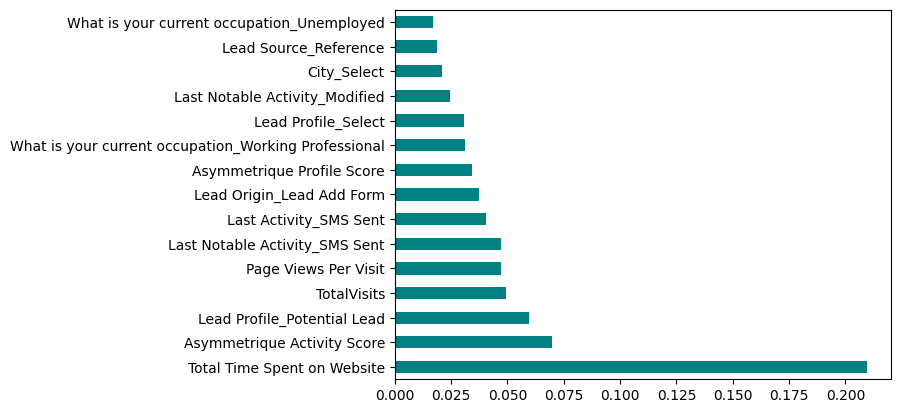

In [ ]:
x=data1.drop(['Prospect ID','Converted'],axis=1)
#Target Variable
y=data1['Converted']
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x, y)

(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(15)
   .plot(kind='barh',color='teal'))

**Dealing with Multicollinearity problem**(When  Independent vriables are correlated)

In [ ]:
correlations = data1.corr()
correlations = correlations.where(np.triu(np.ones(correlations.shape, dtype=bool), k=1))
correlations = correlations.unstack().reset_index()
correlations.columns = ['VAR1', 'VAR2', 'Correlation']
correlations.dropna(subset=["Correlation"], inplace=True)
correlations["Correlation"] = correlations["Correlation"].abs()
correlations.sort_values(by='Correlation', ascending=False, inplace=True)
correlations.head(15)

,VAR1,VAR2,Correlation
1090,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
636,Asymmetrique Profile Score,Asymmetrique Activity Score,0.973984
7949,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.877108
1539,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
7767,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.852707
5550,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,0.849653
7042,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.842496
6861,Last Notable Activity_Email Link Clicked,Last Activity_Email Link Clicked,0.800764
6096,Lead Profile_Select,Lead Profile_Potential Lead,0.779650
453,Page Views Per Visit,TotalVisits,0.759256


In [ ]:
#Dropping highly correlated  variables
data_n=data1.drop(['Lead Origin_Lead Import','Asymmetrique Profile Score','Last Activity_Unsubscribed','Lead Source_Reference','Last Activity_SMS Sent','Last Activity_Email Opened','Last Activity_Email Link Clicked','Page Views Per Visit','Last Activity_Page Visited on Website','Last Activity_Email Bounced','How did you hear about X Education_Select','Last Activity_Unreachable','Lead Profile_Select','Specialization_Select'],axis=1)

In [ ]:
correlations = data_n.corr()

correlations = correlations.where(np.triu(np.ones(correlations.shape, dtype=bool), k=1))
correlations = correlations.unstack().reset_index()
correlations.columns = ['VAR1', 'VAR2', 'Correlation']
correlations.dropna(subset=["Correlation"], inplace=True)
correlations["Correlation"] = correlations["Correlation"].abs()
correlations.sort_values(by='Correlation', ascending=False, inplace=True)
correlations.head(10)

,VAR1,VAR2,Correlation
3695,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,0.849653
4414,City_Select,Lead Origin_Landing Page Submission,0.563957
5110,Last Notable Activity_Had a Phone Conversation,Last Activity_Other_Activity,0.522885
842,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,0.512950
5232,Last Notable Activity_Modified,Last Notable Activity_Email Opened,0.507426
839,Lead Source_Olark Chat,TotalVisits,0.488196
459,Lead Origin_Landing Page Submission,TotalVisits,0.466082
3618,What is your current occupation_Unemployed,What is your current occupation_Student,0.450486
1147,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.430407
1303,Last Activity_Olark Chat Conversation,Lead Source_Olark Chat,0.426248


<Axes: >

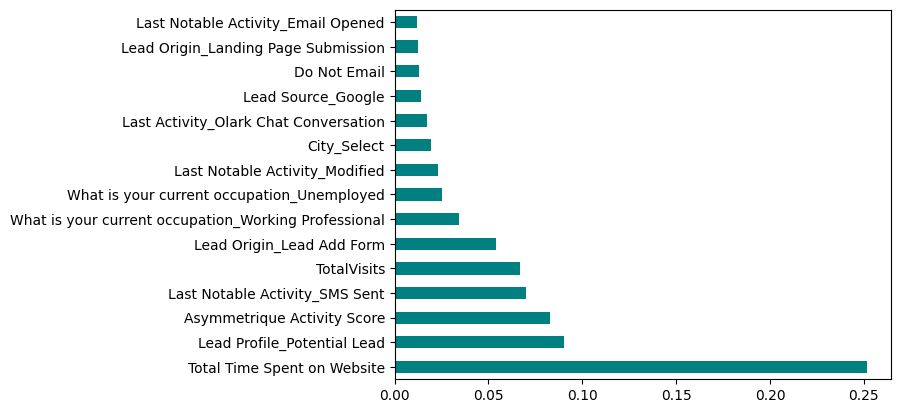

In [ ]:
x=data_n.drop(['Prospect ID','Converted'],axis=1)
#Target Variable
y=data_n['Converted']
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x, y)

(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(15)
   .plot(kind='barh',color='teal'))

In [ ]:
data_n.to_csv("scaled_data.csv")

# Training and Testing the Data

In [ ]:
data_n.shape

(9240, 77)

In [ ]:
from sklearn.model_selection import train_test_split

X=data_n.drop(['Prospect ID','Converted'],axis=1)

X.head

<bound method NDFrame.head of       Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0                0            0    -1.124516                    -0.889974   
1                0            0     0.669119                     0.339972   
2                0            0    -0.407062                     1.905689   
3                0            0    -0.765789                    -0.333396   
4                0            0    -0.407062                     1.715905   
...            ...          ...          ...                          ...   
9235             1            0     1.745300                     2.476865   
9236             0            0    -0.407062                    -0.455661   
9237             1            0    -0.407062                    -0.526830   
9238             0            0    -0.048335                     0.020624   
9239             0            0     1.027846                     1.444003   

      Asymmetrique Activity Score  Lead Origi

In [ ]:
y=data_n['Converted']

y.head

<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64>

In [ ]:
X.shape

(9240, 75)

In [ ]:
y.shape

(9240,)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3)

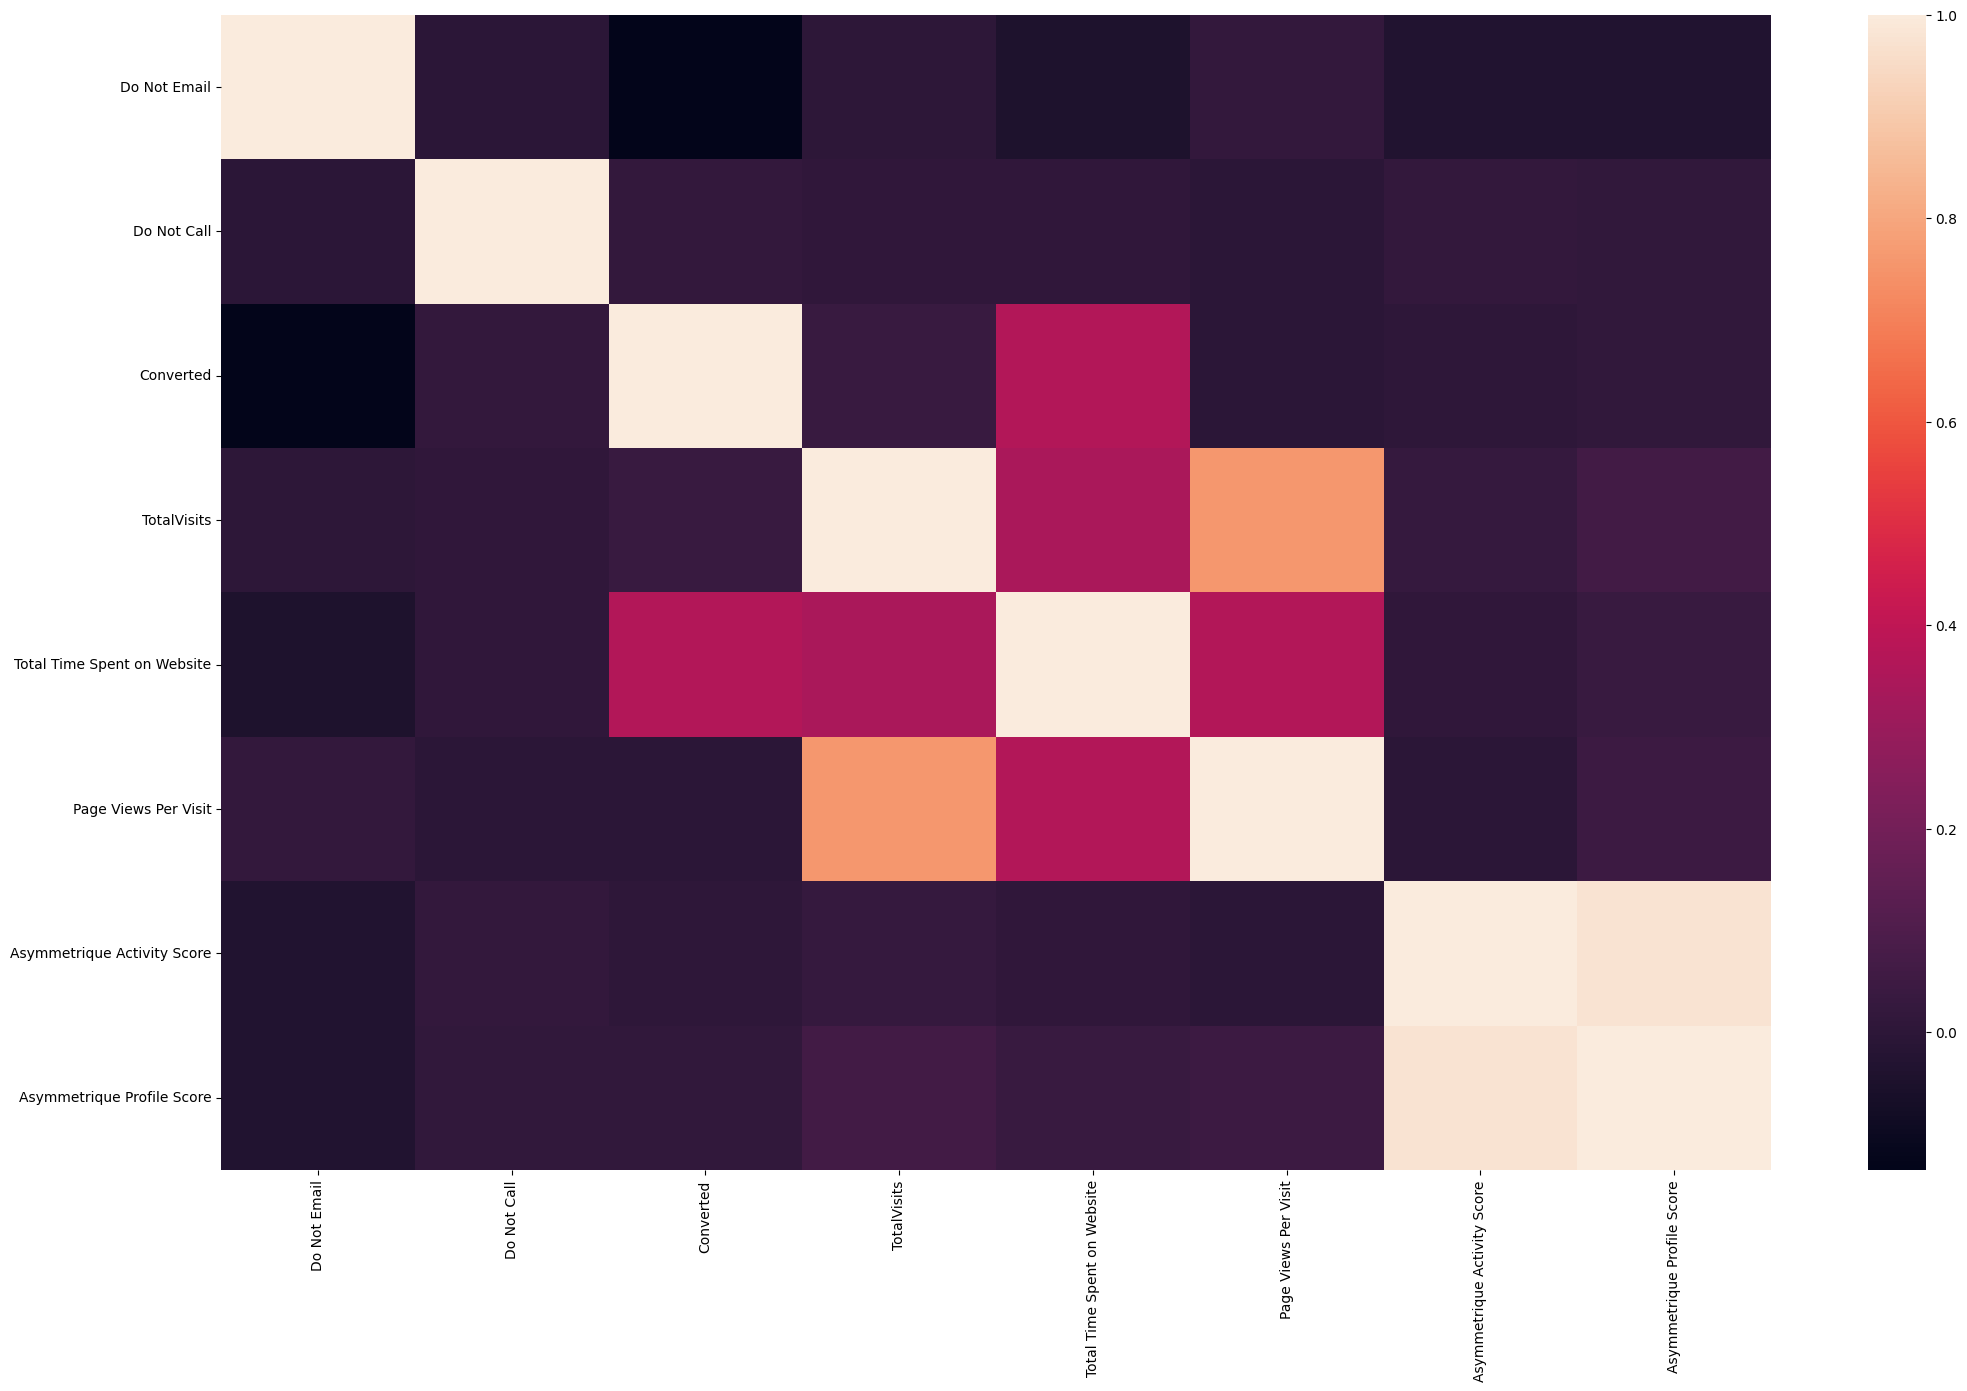

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr())
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Assuming logreg is your Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust parameters as needed

# Assuming X_train and y_train are your training data
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit the RFE model to your data
rfe.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)



Selected Features: Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity',
       'How did you hear about X Education_Email',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'City_Select',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')


In [ ]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Asymmetrique Activity Score', False, 44),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Others', False, 43),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Form Submitted on Website', False, 38),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Specialization_Business Administration', False, 36),
 ('Specialization_E-Business', False, 28),
 ('Specialization_E-COMMERCE', False, 24),
 ('Specialization_Finance Management', False, 29),
 ('Specialization_Healthcare Management', False, 37),
 ('Special

In [ ]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

X_train = X_train[col]

In [ ]:
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity',
       'How did you hear about X Education_Email',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool', 'City_Select',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [ ]:
# fit a logistic regression model on xtrain and after adding a constant and output sum

import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
res = logm2.fit()

# Displaying the summary
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Tue, 14 Nov 2023   Deviance:                       5013.2
Time:                        13:26:22   Pearson chi2:                 9.37e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4296
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# Make a VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display the VIF data
print(vif_data)



                                             Variable   VIF
0                                        Do Not Email  1.15
1                                         Do Not Call  1.00
2                         Total Time Spent on Website  1.27
3                           Lead Origin_Lead Add Form  1.67
4                              Lead Source_Olark Chat  1.78
5                        Lead Source_Welingak Website  1.26
6               Last Activity_Olark Chat Conversation  1.41
7                        Last Activity_Other_Activity  1.38
8            How did you hear about X Education_Email  1.01
9           What is your current occupation_Housewife  1.00
10         What is your current occupation_Unemployed  2.06
11  What is your current occupation_Working Profes...  1.36
12                       Lead Profile_Lateral Student  1.01
13                        Lead Profile_Potential Lead  1.44
14                 Lead Profile_Student of SomeSchool  1.04
15                                      

In [ ]:
cols_to_drop = ['What is your current occupation_Housewife']
X_train.drop(columns = cols_to_drop, inplace = True)

In [ ]:
# Refit the model with the new set of features
# fit a logistic regression model on xtrain and after adding a constant and output sum

import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
res = logm3.fit()

# Displaying the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.2
Date:                Tue, 14 Nov 2023   Deviance:                       5020.4
Time:                        13:26:23   Pearson chi2:                 9.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4289
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# Make a VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display the VIF data
print(vif_data)

                                             Variable   VIF
0                                        Do Not Email  1.15
1                                         Do Not Call  1.00
2                         Total Time Spent on Website  1.27
3                           Lead Origin_Lead Add Form  1.67
4                              Lead Source_Olark Chat  1.78
5                        Lead Source_Welingak Website  1.26
6               Last Activity_Olark Chat Conversation  1.41
7                        Last Activity_Other_Activity  1.38
8            How did you hear about X Education_Email  1.01
9          What is your current occupation_Unemployed  2.06
10  What is your current occupation_Working Profes...  1.36
11                       Lead Profile_Lateral Student  1.01
12                        Lead Profile_Potential Lead  1.44
13                 Lead Profile_Student of SomeSchool  1.04
14                                        City_Select  1.55
15     Last Notable Activity_Had a Phone

In [ ]:
'''cols_to_drop = ['Do Not Call']
X_train.drop(columns = cols_to_drop, inplace = True)'''

"cols_to_drop = ['Do Not Call']\nX_train.drop(columns = cols_to_drop, inplace = True)"

In [ ]:
#column_to_drop = ['What matters most to you in choosing a course_Flexibility & Convenience', 'What is your current occupation_Working Professional']

#X_train.drop(columns=column_to_drop, inplace=True)


In [ ]:
# Refit the model with the new set of features
import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_sm = sm.add_constant(X_train)

# Creating a logistic regression model
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fitting the model
res = logm4.fit()

# Displaying the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.2
Date:                Tue, 14 Nov 2023   Deviance:                       5020.4
Time:                        13:26:24   Pearson chi2:                 9.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4289
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display the VIF data
print(vif_data)

                                             Variable   VIF
0                                        Do Not Email  1.15
1                                         Do Not Call  1.00
2                         Total Time Spent on Website  1.27
3                           Lead Origin_Lead Add Form  1.67
4                              Lead Source_Olark Chat  1.78
5                        Lead Source_Welingak Website  1.26
6               Last Activity_Olark Chat Conversation  1.41
7                        Last Activity_Other_Activity  1.38
8            How did you hear about X Education_Email  1.01
9          What is your current occupation_Unemployed  2.06
10  What is your current occupation_Working Profes...  1.36
11                       Lead Profile_Lateral Student  1.01
12                        Lead Profile_Potential Lead  1.44
13                 Lead Profile_Student of SomeSchool  1.04
14                                        City_Select  1.55
15     Last Notable Activity_Had a Phone

# Model Evaluation

In [ ]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7804    0.127078
5357    0.369769
5038    0.453447
6800    0.234915
3037    0.129994
8828    0.649633
1829    0.753633
9099    0.073930
4617    0.018051
5231    0.495737
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12707813, 0.36976893, 0.45344724, 0.23491522, 0.12999424,
       0.6496328 , 0.75363332, 0.07392971, 0.01805137, 0.49573748])

In [ ]:
# Create a new dataframe containing the actual conversion flag and the probabilities pr
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
#y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob
0,0,0.127078
1,0,0.369769
2,0,0.453447
3,0,0.234915
4,0,0.129994


In [ ]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,predicted
0,0,0.127078,0
1,0,0.369769,0
2,0,0.453447,0
3,0,0.234915,0
4,0,0.129994,0


In [ ]:
# EVALUATING THE MODEL
#import statements
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score

In [ ]:
#y_true is the actual labels and y_pred is the predicted labels
y_true = y_train_pred_final.Converted
y_pred = y_train_pred_final.predicted

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3525  428]
 [ 707 1808]]


In [ ]:
# Classification Report
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3953
           1       0.81      0.72      0.76      2515

    accuracy                           0.82      6468
   macro avg       0.82      0.81      0.81      6468
weighted avg       0.82      0.82      0.82      6468



In [ ]:
# Sensitivity, Specificity, Precision, Recall, and Accuracy
TP = conf_matrix[1, 1]  # True Positive
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (True Positive Rate): 0.72
Specificity (True Negative Rate): 0.89
Precision: 0.81
Accuracy: 0.82


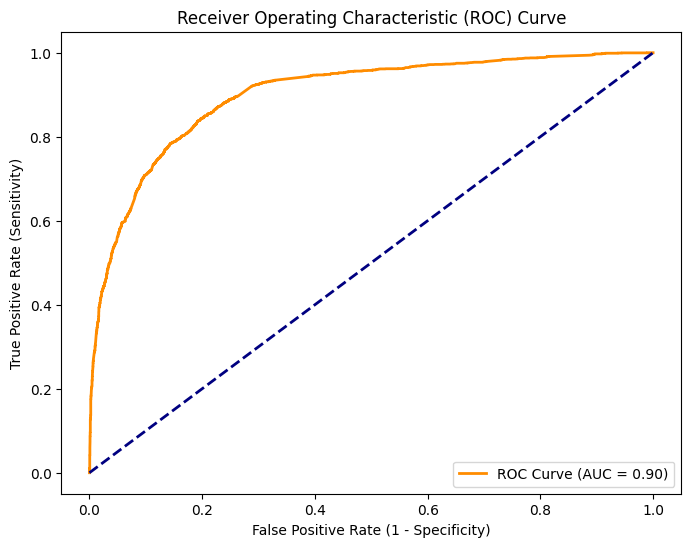

In [ ]:
# OPTIMAL CUTOFF SELECTION
#predicted probabilities for the positive class
y_prob = y_train_pred_final.Lead_Score_Prob

#ROC curve and ROC area for the positive class
fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

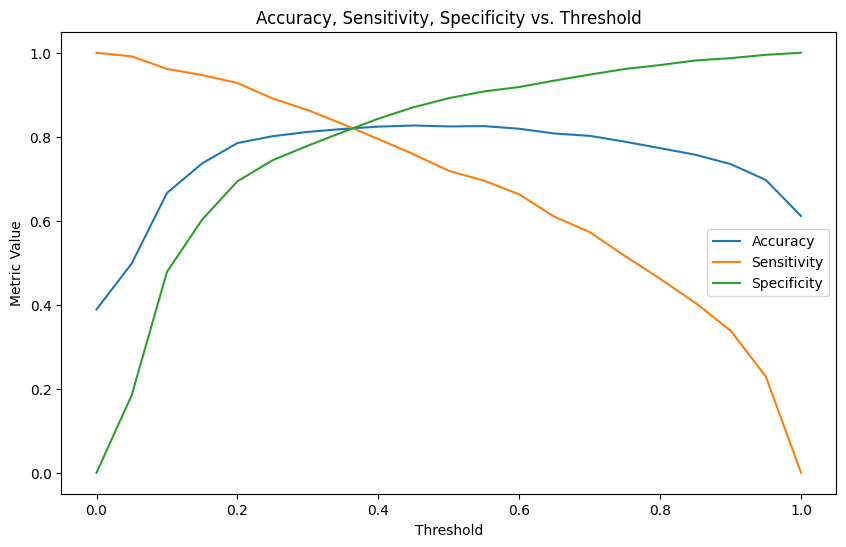

In [ ]:
# Plot Accuracy, Sensitivity, Specificity with different thresholds
thresholds_range = np.arange(0, 1.05, 0.05)
accuracy_list = []
sensitivity_list = []
specificity_list = []

for threshold in thresholds_range:
    y_train_pred_final['predicted_threshold'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > threshold else 0)
    conf_matrix_threshold = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_threshold)
    accuracy = (conf_matrix_threshold[0, 0] + conf_matrix_threshold[1, 1]) / float(np.sum(conf_matrix_threshold))
    sensitivity = conf_matrix_threshold[1, 1] / float(conf_matrix_threshold[1, 1] + conf_matrix_threshold[1, 0])
    specificity = conf_matrix_threshold[0, 0] / float(conf_matrix_threshold[0, 0] + conf_matrix_threshold[0, 1])

    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Plot Accuracy, Sensitivity, Specificity vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds_range, accuracy_list, label='Accuracy')
plt.plot(thresholds_range, sensitivity_list, label='Sensitivity')
plt.plot(thresholds_range, specificity_list, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Accuracy, Sensitivity, Specificity vs. Threshold')
plt.legend()
plt.show()


In [ ]:
# Find the cutoff point where metrics intersect
optimal_threshold = 0
min_difference = float('inf')

for i, (acc, sens, spec) in enumerate(zip(accuracy_list, sensitivity_list, specificity_list)):
    # Calculate the absolute differences between the metrics
    diff_acc_sens = abs(acc - sens)
    diff_acc_spec = abs(acc - spec)
    diff_sens_spec = abs(sens - spec)

    # Calculate the average difference
    avg_diff = (diff_acc_sens + diff_acc_spec + diff_sens_spec) / 3

    # Check if the average difference is the minimum encountered so far
    if avg_diff < min_difference:
        min_difference = avg_diff
        optimal_threshold = thresholds_range[i]

# Print the cutoff point
print(f"Intersection Cutoff Point: {optimal_threshold:.4f}")


Intersection Cutoff Point: 0.3500


In [ ]:
"""# Find the optimal cutoff
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds_roc[optimal_idx]
print(f"Optimal Cutoff Probability: {optimal_threshold:.4f}")"""

'# Find the optimal cutoff\noptimal_idx = np.argmax(tpr - fpr)\noptimal_threshold = thresholds_roc[optimal_idx]\nprint(f"Optimal Cutoff Probability: {optimal_threshold:.4f}")'

In [ ]:
# Update predictions based on the optimal cutoff
y_train_pred_final['predicted_optimal'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > optimal_threshold else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,predicted,predicted_threshold,predicted_optimal
0,0,0.127078,0,0,0
1,0,0.369769,0,0,1
2,0,0.453447,0,0,1
3,0,0.234915,0,0,0
4,0,0.129994,0,0,0


In [ ]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Lead_Score_Prob,predicted,predicted_threshold,predicted_optimal,Lead_Score
0,0,0.127078,0,0,0,13
1,0,0.369769,0,0,1,37
2,0,0.453447,0,0,1,45
3,0,0.234915,0,0,0,23
4,0,0.129994,0,0,0,13


In [ ]:
# Confusion Matrix with the optimal cutoff
conf_matrix_optimal = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_optimal)
print("Confusion Matrix with Optimal Cutoff:")
print(conf_matrix_optimal)

Confusion Matrix with Optimal Cutoff:
[[3207  746]
 [ 428 2087]]


In [ ]:
# Classification Report with the optimal cutoff
class_report_optimal = classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted_optimal)
print("Classification Report with Optimal Cutoff:")
print(class_report_optimal)

Classification Report with Optimal Cutoff:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      3953
           1       0.74      0.83      0.78      2515

    accuracy                           0.82      6468
   macro avg       0.81      0.82      0.81      6468
weighted avg       0.83      0.82      0.82      6468



In [ ]:
# Sensitivity, Specificity, Precision, Recall, and Accuracy
TP = conf_matrix_optimal[1, 1]  # True Positive
TN = conf_matrix_optimal[0, 0]  # True Negative
FP = conf_matrix_optimal[0, 1]  # False Positive
FN = conf_matrix_optimal[1, 0]  # False Negative

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (True Positive Rate): 0.83
Specificity (True Negative Rate): 0.81
Precision: 0.74
Accuracy: 0.82


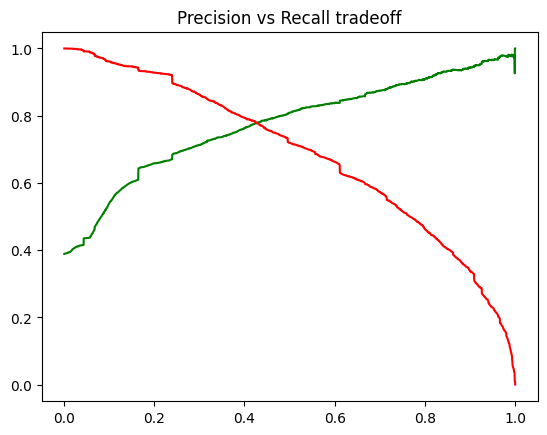

In [ ]:
#Let us generate the Precision vs Recall tradeoff curve
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

# Prediction on the Test Set

In [ ]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,How did you hear about X Education_Email,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Select,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3339,0,0,-0.889974,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6174,0,0,-0.889974,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1028,0,0,-0.889974,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
258,0,0,-0.063319,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4660,1,0,-0.889974,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
# adding constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,How did you hear about X Education_Email,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Select,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3339,1.0,0,0,-0.889974,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6174,1.0,0,0,-0.889974,0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1028,1.0,0,0,-0.889974,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
258,1.0,0,0,-0.063319,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4660,1.0,1,0,-0.889974,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
#check if train and test both have same features

In [ ]:
X_train_sm.shape

(6468, 20)

In [ ]:
X_test_sm.shape

(2772, 21)

In [ ]:
# we can see that there is an extra column present in X_test that we dropped in X_train

In [ ]:
#dropping the extra column
cols_to_drop = ['What is your current occupation_Housewife']
X_test_sm.drop(columns = cols_to_drop, inplace = True)
X_test_sm.shape

(2772, 20)

In [ ]:
# make prediction
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]


3339    0.965957
6174    0.018051
1028    0.043555
258     0.130675
4660    0.737948
3527    0.209863
2678    0.113325
3140    0.164590
5119    0.014384
4188    0.440577
dtype: float64

In [ ]:
# convert y_test prediction to df and check head
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()


,0
3339,0.965957
6174,0.018051
1028,0.043555
258,0.130675
4660,0.737948


In [ ]:
# convert actual y_test to df and check head
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3339,1
6174,0
1028,0
258,0
4660,1


In [ ]:
# merge both df

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.965957
1,0,0.018051
2,0,0.043555
3,0,0.130675
4,1,0.737948


In [ ]:
#rename column 0 to lead_score_prob
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.965957
1,0,0.018051
2,0,0.043555
3,0,0.130675
4,1,0.737948


In [ ]:
# make predictions using optimal cutoff
y_pred_final['Optimal_Prediction'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > optimal_threshold else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Optimal_Prediction
0,1,0.965957,1
1,0,0.018051,0
2,0,0.043555,0
3,0,0.130675,0
4,1,0.737948,1


In [ ]:
# Classification Report with the optimal cutoff
class_report_optimal = classification_report(y_pred_final.Converted, y_pred_final.Optimal_Prediction)
print("Classification Report of y test prediction with Optimal Cutoff:")
print(class_report_optimal)

Classification Report of y test prediction with Optimal Cutoff:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1726
           1       0.74      0.81      0.77      1046

    accuracy                           0.82      2772
   macro avg       0.81      0.82      0.81      2772
weighted avg       0.83      0.82      0.82      2772



In [ ]:

#y_true is the actual labels and y_pred is the predicted labels
y_true = y_pred_final.Converted
y_pred = y_pred_final.Optimal_Prediction

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1431  295]
 [ 198  848]]


In [ ]:
# calculate Sensivity, specifivity, precision and accuracy

TP = conf_matrix[1,1] # true positive
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)
precision = TP / float(TP + FP)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (True Positive Rate): 0.81
Specificity (True Negative Rate): 0.83
Precision: 0.74
Accuracy: 0.82


CONCLUSION: The prediction testing proves that the model can effectively detect hot leads. By using the optimal cutoff value, the model showed it could accurately identify hot leads. The classificatino report at the end gives a quick overview confirming that the model is pretty good at determining if a lead is hot or not.